In [3]:
import numpy as np
import pandas as pd
from scipy import stats

%precision 3
np.random.seed(1111)

In [6]:
import matplotlib.pyplot as plt

In [7]:
#성적 데이터
df = pd.read_csv('./data/ch4_scores400.csv')
scores = np.array(df['score'])


In [8]:
**문제1**
표준정규분포로부터 뽑아 95% 신뢰구간을 구하는것을 20번 반복했을 때, 몇개의 신뢰구간이 모평균을 포함할지 확인

SyntaxError: invalid syntax (Temp/ipykernel_85380/3635804659.py, line 1)

In [9]:
# 성적데이터 모집단의 평균과 분산 계산
p_mean=np.mean(scores)
p_var=np.var(scores)

p_mean, p_var

(69.53, 206.6691)

In [42]:
#모집단의 분포
xs=np.arange(101)
rv=stats.norm(p_mean, np.sqrt(p_var))
plt.plt(xs,rv.pdf(xs), color='gray') # 평균 69.53, 분산 206.67
plt.hist(scores, bins=100, range(0,100), density=True)
plt.show()

SyntaxError: positional argument follows keyword argument (Temp/ipykernel_85380/3797202412.py, line 5)

In [16]:
#sample 데이터 생성
n_sam = 10000
n=20
samples = np.random.choice(scores, (n_sam,n))
samples[:5]

array([[87, 64, 76, 89, 50, 67, 86, 62, 77, 99, 83, 64, 61, 64, 93, 61,
        89, 78, 56, 45],
       [72, 34, 74, 63, 65, 74, 85, 69, 59, 92, 52, 73, 79, 46, 65, 83,
        61, 61, 58, 64],
       [68, 76, 29, 68, 79, 57, 77, 90, 79, 85, 59, 68, 93, 68, 56, 86,
        72, 52, 84, 41],
       [77, 63, 61, 84, 92, 79, 91, 49, 83, 60, 63, 65, 70, 93, 63, 63,
        61, 87, 74, 59],
       [60, 93, 80, 89, 90, 62, 23, 29, 63, 82, 89, 68, 59, 86, 80, 54,
        46, 73, 67, 69]], dtype=int64)

In [20]:
rv=stats.norm()
rv.isf(0.025)

1.9599639845400545

In [21]:
rv.isf(0.975)

-1.959963984540054

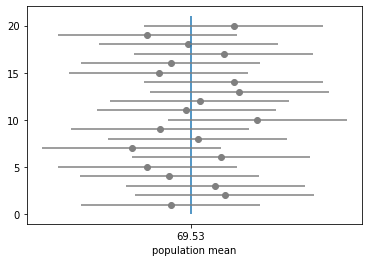

In [41]:
#모분산을 아는경우 95% 신뢰구간: 정규분포를 이용

rv = stats.norm()
n_samples = 20
n=20

plt.vlines(p_mean, 0, 21)
for i in range(n_samples):
    sample_=samples[i]
    s_mean = np.mean(sample_)
    lcl = s_mean - rv.isf(0.025)*np.sqrt(p_var/20)
    ucl = s_mean + rv.isf(0.025)*np.sqrt(p_var/20)
    #ucl = s_mean - rv.isf(0.975)*np.sqrt(n_var/20) 위 아래가 같음.
    if lcl <= p_mean <= ucl:
        plt.scatter(s_mean, n_samples-i, color='gray')
        plt.hlines(n_samples-i,lcl,ucl,color='gray')
    else:
        plt.scatter(s_mean, n_samples-i, color='b')
        plt.hlines(n_samples-i,lcl,ucl,color='b')

plt.xticks([p_mean])
plt.xlabel('population mean')
plt.show()
    

In [31]:
#모분산을 모르는 경우 신뢰구간
n=20
alpha=0.25
sample_=samples[0]
s_mean=np.mean(sample_)
s_var=np.var(sample_)
rv=stats.t(df=n-1)
lcl=s_mean - rv.isf(alpha)*np.sqrt(s_var/n)
ucl=s_mean + rv.isf(alpha)*np.sqrt(s_var/n)
lcl,ucl

(70.2722831061354, 74.82771689386459)

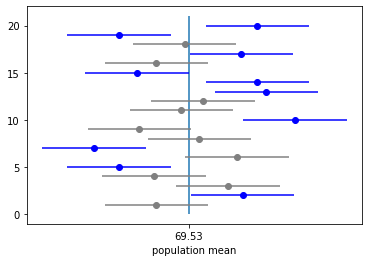

In [39]:
n_samples = 20
n=20
rv=stats.t(df=n-1)
alpha=0.25

plt.vlines(p_mean, 0, 21)
for i in range(n_samples):
    sample_=samples[i]
    s_mean = np.mean(sample_)
    lcl = s_mean - rv.isf(alpha)*np.sqrt(s_var/n)
    ucl = s_mean + rv.isf(alpha)*np.sqrt(s_var/n)
    #ucl = s_mean - rv.isf(0.975)*np.sqrt(n_var/20) 위 아래가 같음.
    if lcl <= p_mean <= ucl:
        plt.scatter(s_mean, n_samples-i, color='gray')
        plt.hlines(n_samples-i,lcl,ucl,color='gray')
    else:
        plt.scatter(s_mean, n_samples-i, color='b')
        plt.hlines(n_samples-i,lcl,ucl,color='b')

plt.xticks([p_mean])
plt.xlabel('population mean')
plt.show()
    

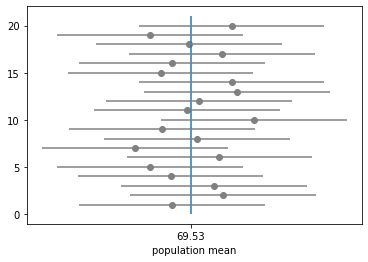

In [33]:
n_samples = 20
n = 20
rv = stats.t(df = n-1)
alpha = 0.025
plt.vlines(p_mean, 0, 21)
for i in range(n_samples):
    sample_ = samples[i]
    s_mean = np.mean(sample_)
    lcl = s_mean - rv.isf(alpha) * np.sqrt(s_var / n)
    ucl = s_mean + rv.isf(alpha) * np.sqrt(s_var / n)
#     ucl = s_mean - rv.isf(0.975) * np.sqrt(n_var / 20)
    if lcl <= p_mean <= ucl:
        plt.scatter(s_mean, n_samples-i, color = 'gray')
        plt.hlines(n_samples - i, lcl, ucl, color = 'gray')
    else:
        plt.scatter(s_mean, n_samples-i, color = 'b')
        plt.hlines(n_samples - i, lcl, ucl, color = 'b')

plt.xticks([p_mean])
plt.xlabel('population mean')
plt.show()


In [ ]:
**문제2.**
만 7세 어린이 중 부모의 동의를 얻은 학생 중 10명을 표본으로 추출.
머리 둘레를 측정한 결과를 기준으로 모평균에 대한 95% 신뢰구간을 추정하시오.

In [44]:
#표본 데이터
data=[520.498,481,512,515,542,520,518,527,526]
s_mean=np.mean(data)
s_var=np.var(data)
n=len(data)
print(n)
rv=stats.t(df=n-1)
alpha=0.025
lcl = s_mean - rv.isf(alpha)* np.sqrt(s_var/n)
ucl = s_mean + rv.isf(alpha)* np.sqrt(s_var/n)
lcl, ucl

9


(506.07690144924425, 529.8115429952)

In [45]:
#정규분포를 이용한 경우 

rv=stats.norm()
alpha=0.025
lcl = s_mean - rv.isf(alpha)* np.sqrt(s_var/n)
ucl = s_mean + rv.isf(alpha)* np.sqrt(s_var/n)
lcl, ucl

(507.85771762552326, 528.030726818921)

In [62]:
#감자 무게 측정데이터

df=pd.read_csv('./data/ch11_potato.csv')
sample=np.array(df['무게'])
sample

array([122.02, 131.73, 130.6 , 131.82, 132.05, 126.12, 124.43, 132.89,
       122.79, 129.95, 126.14, 134.45, 127.64, 125.68])

In [63]:
# 표본 평균 확인
s_mean=np.mean(sample)
s_mean

128.4507142857143

In [64]:
#표본 분산 확인
s_var = np.var(sample)
s_var

14.735449489795883

In [65]:
# 모분산=9
rv=stats.norm(130,np.sqrt(9/14))
rv.isf(0.95)

128.68118313069039

In [66]:
#검정 통계량 Z
Z=(s_mean-130)/np.sqrt(9/14)
Z

-1.932298779026813

In [67]:
#양측검정, 임계값: 표준 정규분포의 95% 구간에 따라 구할 수 있음
rv=stats.norm()
rv.interval(0.95)

(-1.959963984540054, 1.959963984540054)

In [68]:
# 양측검정의 p값
rv.cdf()

TypeError: cdf() missing 1 required positional argument: 'x'

In [69]:
#모분산을 아는 경우 모평균에 대한 양측검정을 위한 함수 
#정규분포를 기반

def pmean_test(sample, mean0, p_var, alpha=0.05):
    s_mean = np.mean(sample)
    n = len(sample)
    rv = stats.norm()
    interval = rv.interval(1-alpha)

    z = (s_mean - mean0) / np.sqrt(p_var/n)
    if interval[0] <= z <= interval[1]:
        print('귀무가설을 채택')
    else:
        print('귀무가설을 기각')

    if z < 0:
        p = rv.cdf(z) * 2
    else:
        p = (1 - rv.cdf(z)) * 2
    print(f'p값은 {p:.3f}')


In [72]:
pmean_test(sample,130)

귀무가설을 채택
p값은 0.169


In [71]:
#양측검정

def pmean_test(sample, mean0, alpha=0.05):
    s_mean = np.mean(sample)
    u_var = np.var(sample, ddof=1)
    n = len(sample)
    rv = stats.t(df=n-1)
    interval = rv.interval(1-alpha) #임계값 계산

    t = (s_mean - mean0) / np.sqrt(u_var/n)
    if interval[0] <= t <= interval[1]:
        print('귀무가설을 채택')
    else:
        print('귀무가설을 기각')

    if t < 0:
        p = rv.cdf(t) * 2
    else:
        p = (1 - rv.cdf(t)) * 2
    print(f'p값은 {p:.3f}')


In [73]:
t,p=stats.ttest_1samp(sample,130)
t,p #통계량, p-value

(-1.4551960206404198, 0.16933464230414275)

In [95]:
“%d” % (500, 600)

SyntaxError: invalid character '“' (U+201C) (Temp/ipykernel_85380/3869021607.py, line 1)

In [96]:
print(“%d” % (500 + 500))

SyntaxError: invalid character '“' (U+201C) (Temp/ipykernel_85380/3081827166.py, line 1)

In [99]:
print("500 + 500")

500 + 500


In [101]:
print("%d" % (500 + 500))

1000


In [105]:
print("%d" % (500, 600))

TypeError: not all arguments converted during string formatting

In [107]:
a=30
print("%d %d" % (700, a))

700 30


In [108]:
a=b

NameError: name 'b' is not defined

In [114]:
inStr,outStr='python',"
strLen=len(inStr)
for i in range(0,strLen)
    outStr += inStr[strLen-i]
print('내용을 거꾸로 출력: %s'%outStr)

SyntaxError: EOL while scanning string literal (Temp/ipykernel_85380/3655150630.py, line 1)

In [115]:
import os

In [116]:
import os as *

SyntaxError: invalid syntax (Temp/ipykernel_85380/3241216970.py, line 1)

In [117]:
from os import listdir

In [118]:
from os import *

In [131]:
bool('b' == -1.23)

False

In [132]:
#대응표본 샘플데이터
data=pd.read_csv('./data/ch11_training_rel.csv')
print(data.shape)
data.head()

(20, 2)


,전,후
0,59,41
1,52,63
2,55,68
3,61,59
4,59,84


In [133]:
# 기술통계
data.describe()

,전,후
count,20.000000,20.000000
mean,52.850000,58.250000
std,4.295346,11.964311
min,45.000000,37.000000
25%,50.500000,51.750000
50%,52.000000,58.500000
75%,55.500000,65.750000
max,61.000000,84.000000


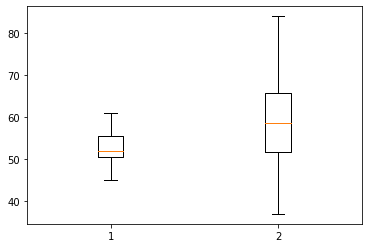

In [135]:
#데이터의 시각화: 상자그림표
import matplotlib.pyplot as plt
plt.boxplot(data)
plt.show()

In [136]:
#정규성 검정
stats.shapiro(data.전)

ShapiroResult(statistic=0.9670043587684631, pvalue=0.6907904148101807)

In [137]:
stats.shapiro(data.후)

ShapiroResult(statistic=0.9786623120307922, pvalue=0.9156785011291504)

In [138]:
diff=data.전-data.후
diff

0     18
1    -11
2    -13
3      2
4    -25
5      8
6     -5
7     -3
8    -19
9    -18
10    -6
11    -8
12     3
13    13
14    -2
15    -6
16   -16
17   -16
18    -2
19    -2
dtype: int64

In [141]:
stats.shapiro(diff)

ShapiroResult(statistic=0.9785391688346863, pvalue=0.9138697981834412)

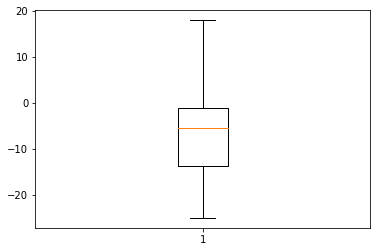

In [142]:
plt.boxplot(diff)
plt.show()

In [140]:
stats.ttest_1samp(data.전-data.후,0)

Ttest_1sampResult(statistic=-2.204154108716127, pvalue=0.04004419061842953)

In [144]:
#### 독립표본 t 검정
- 독립된 두 집단의 평균 비교
- 귀무가설: 두집단의 평균은 같다.
- 대립가설: 두집단의 평균은 차이가 있다.

SyntaxError: invalid syntax (Temp/ipykernel_85380/1398283669.py, line 2)

In [145]:
**예제 데이터**
- 두 학급(A,B)에 근력운동을 수행하여 집중력 테스트
- 귀무가설: 두 학급의 집중력 차이가 없다.
- 대립가설: 두 학급의 집중력 차이가 있다.(양측검정)

SyntaxError: invalid syntax (Temp/ipykernel_85380/3280254975.py, line 1)

In [147]:
data=pd.read_csv('./data/ch11_training_ind.csv')
data.shape

(20, 2)

In [148]:
data.head()

,A,B
0,47,49
1,50,52
2,37,54
3,60,48
4,39,51


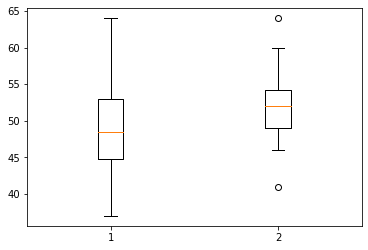

In [154]:
plt.boxplot(data)
plt.show()

In [153]:
#1. 정규성 검정

In [151]:
#정규성 검정
stats.shapiro(data.A)

ShapiroResult(statistic=0.9685941338539124, pvalue=0.7249506711959839)

In [150]:
stats.shapiro(data.B)

ShapiroResult(statistic=0.9730017781257629, pvalue=0.8165717720985413)

In [ ]:
=> 두 학급의 데이터는 모두 정규성을 만족

In [159]:
** 2.등분산성 검정 **
귀무가설: 두집단의 분산이 같다. 

SyntaxError: invalid syntax (Temp/ipykernel_85380/1239058502.py, line 1)

In [156]:
stats.levene(data.A,data.B)

LeveneResult(statistic=2.061573118077718, pvalue=0.15923550057222613)

In [ ]:
=> p값이 0.05보다 크므로 귀무가설을 기각하지 않음. 즉 두 집단의 분산은 같다.(등분산)

In [ ]:
3. 독립표본 t-검정

In [162]:
#equal_var-False로 지정된 경우 웰치 방법 사용
stats.ttest_ind(data.A, data.B, equal_var=True)
#=> 귀무가설 채택: 두집단의 집중력 차이가 없다.

Ttest_indResult(statistic=-1.7608157246524712, pvalue=0.08631600572195147)

In [160]:
stats.ttest_ind(data.A, data.B, equal_var=False)

Ttest_indResult(statistic=-1.760815724652471, pvalue=0.08695731107259361)

### 정규성을 만족하지 않는 경우
1. 대응표본 t-test는 윌콕슨 부호순위검정을 적용
    - stats.wilcoxon(전,후,)


2. 독립표본 t-test는 맨휘트니 U검정 적용
    - stats.mannwhitneyu(A,B,alternative='two-sided')

## 카이제곱 검정

- 범주형 데이터에 대하여
- 카이제곱 분포 근거

1. 적합도 검정: 한 표본 데이터가 어떤 분포를 하는지 
2. 동질성 검정: 두 범주형 데이터가 동일한 분포를 하는지?
3. 독립성 검정: 두 범주형 데이터가 서로 관련성 있는지?(독립)

In [ ]:
** 독립성 검정 **


In [165]:
import numpy as np
import pandas as pd
from scipy import stats

%precision 3
np.random.seed(1111)


In [166]:
# 예제 데이터:
data = pd.read_csv('./data/ch11_ad.csv')
data.shape


(1000, 2)

In [167]:
data.head()

,광고,구입
0,B,하지 않았다
1,B,하지 않았다
2,A,했다
3,A,했다
4,B,하지 않았다


In [168]:
# 교차표 생성
cross=pd.crosstab(data.광고, data.구입)
cross

구입,하지 않았다,했다
광고,,
A,351,49
B,549,51


In [171]:
# 카이제곱 독립성 검정
stat,p,df,exp_tab=stats.chi2_contingency(cross, correction=False)

In [172]:
stat

3.75

In [173]:
p

0.052807511416113395

In [174]:
df

1

In [175]:
exp_tab

array([[360.,  40.],
       [540.,  60.]])